In [1]:
%matplotlib inline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('training_data.csv')

In [3]:
data.head()

id  MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0   3545  3.2375       5.0  6.028881   1.051118      4660.0  2.717201   
1  36760  4.5500      18.0  6.091451   1.030581      1623.0  3.330014   
2  29301  6.0743      16.0  6.394805   1.027350      1574.0  3.091451   
3    285  3.6875      15.0  5.164835   1.056911       616.0  2.737892   
4  30757  6.1273      11.0  6.256544   1.029503      7777.0  2.383468   

   Latitude  Longitude  MedHouseVal  
0     38.10    -122.14        1.924  
1     34.37    -118.52        1.991  
2     34.11    -117.80        2.610  
3     38.49    -122.59        1.917  
4     34.19    -118.64        2.915

In [4]:
data.columns

Index(['id', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [5]:
data.shape

(29709, 10)

In [6]:
data.isnull().sum()

id             0
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [7]:
data.dtypes

id               int64
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

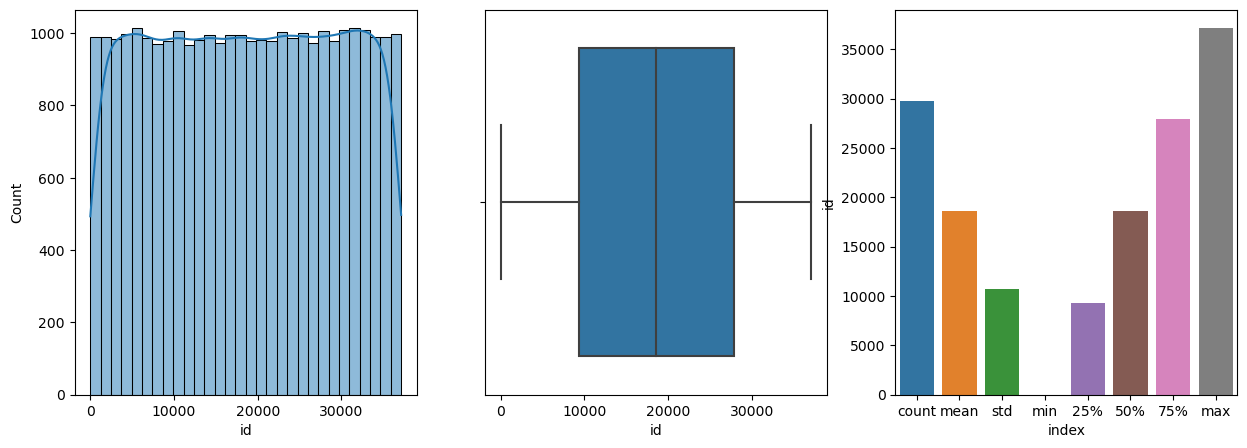

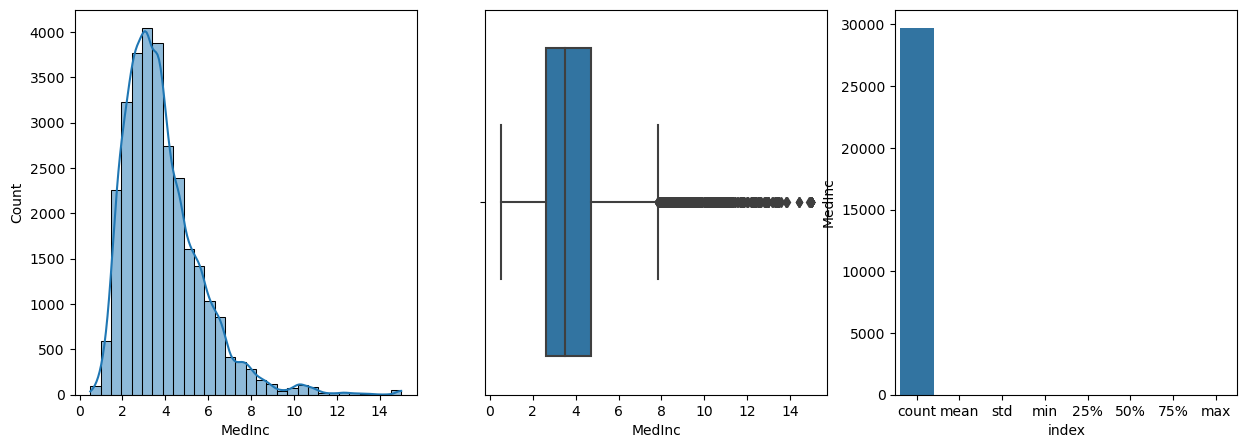

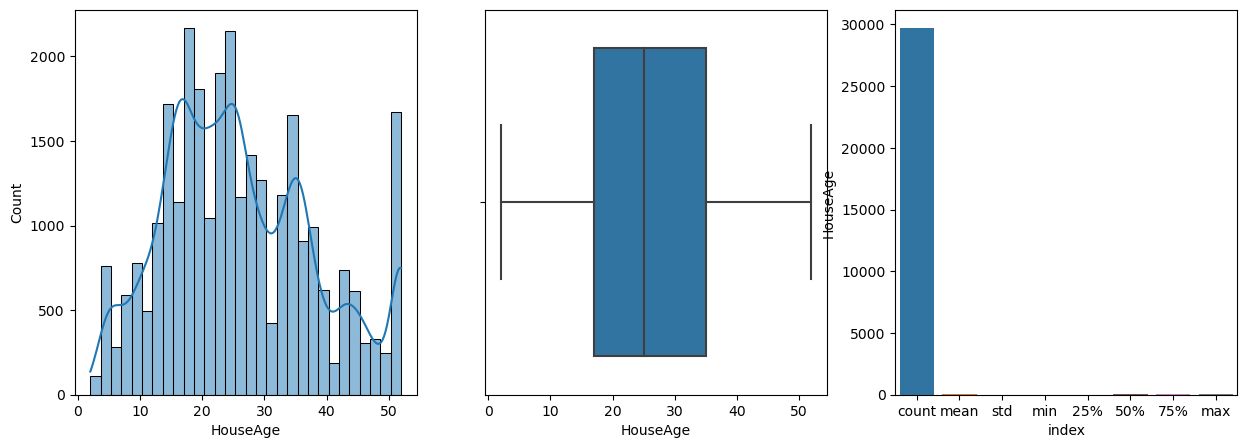

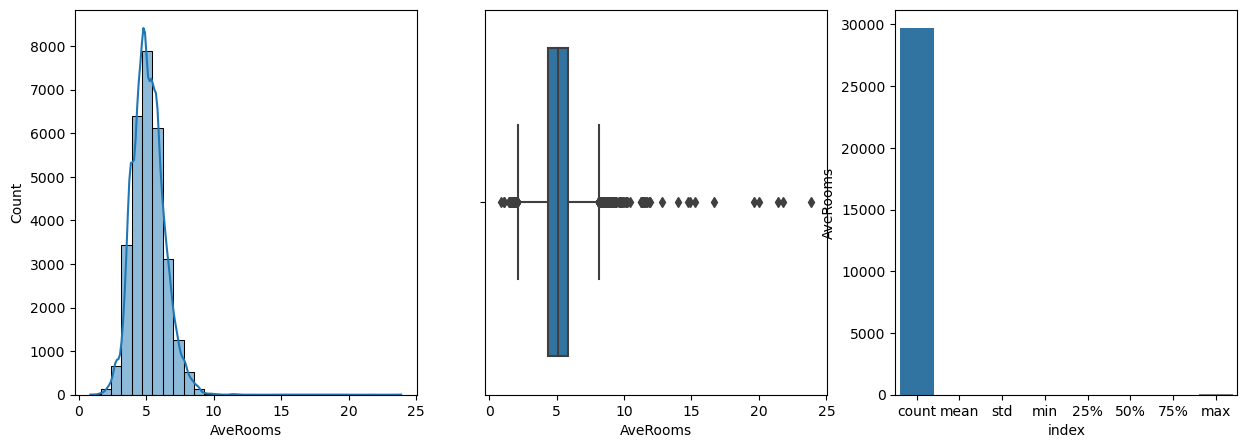

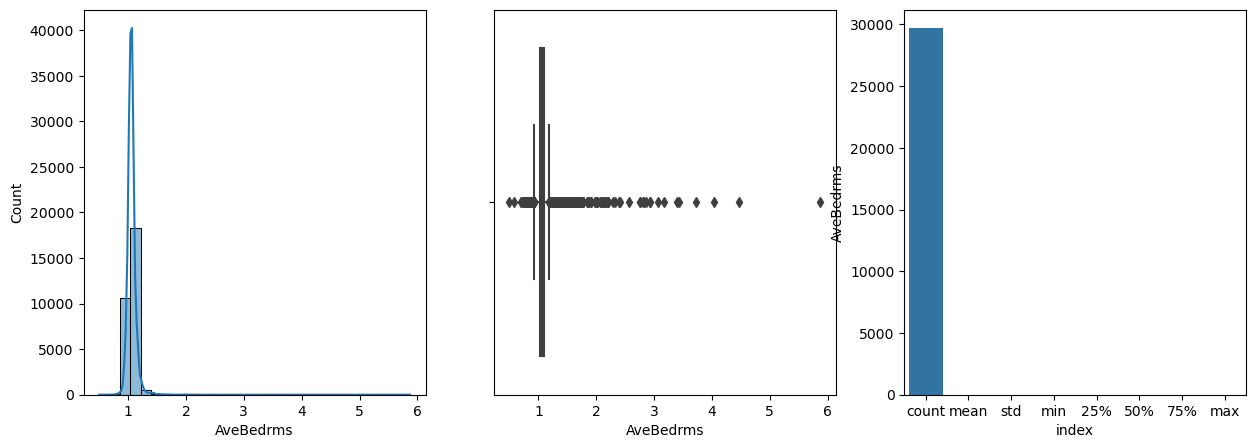

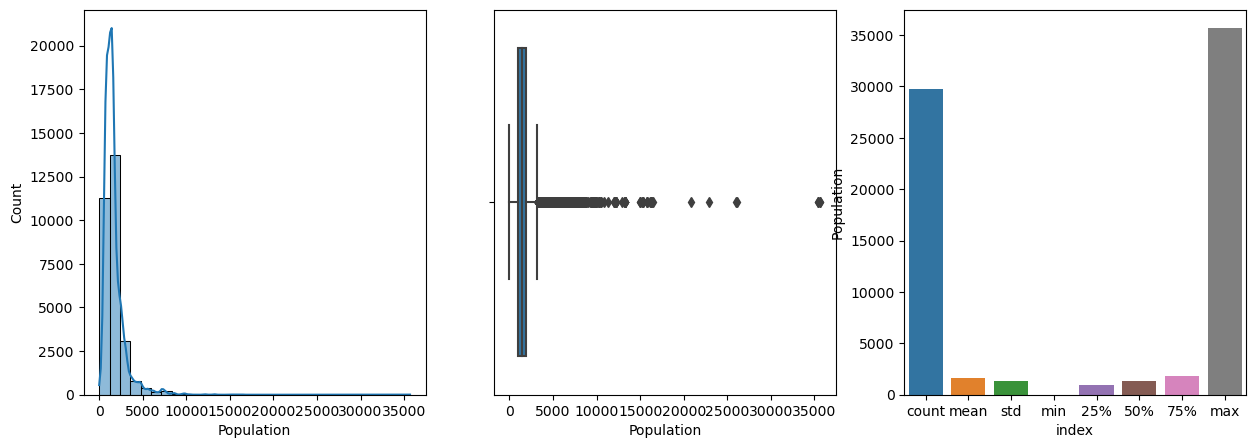

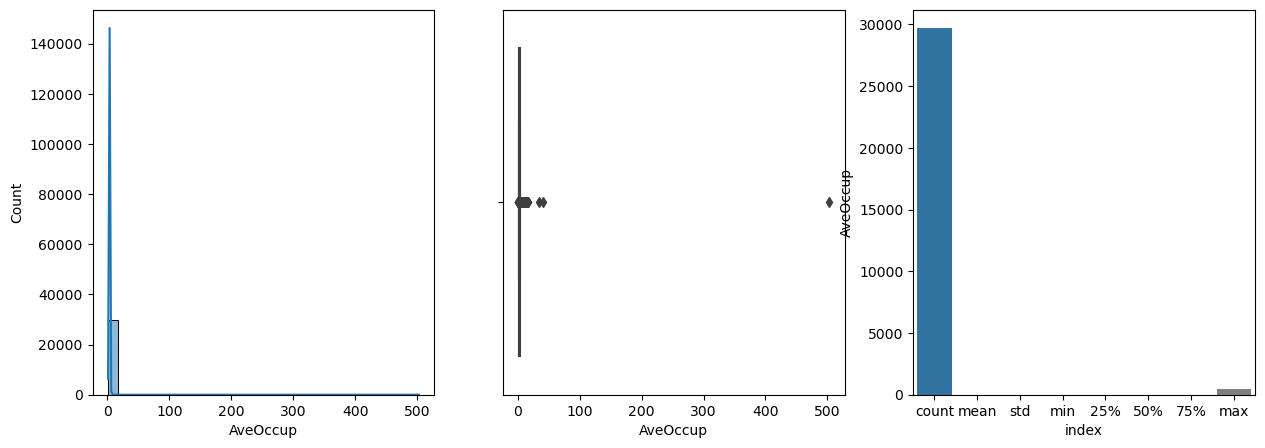

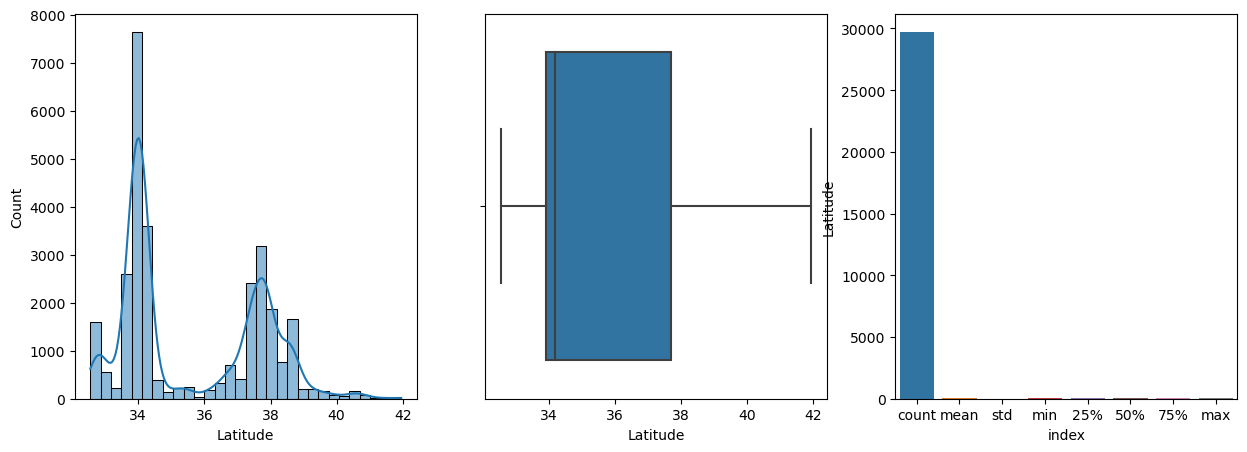

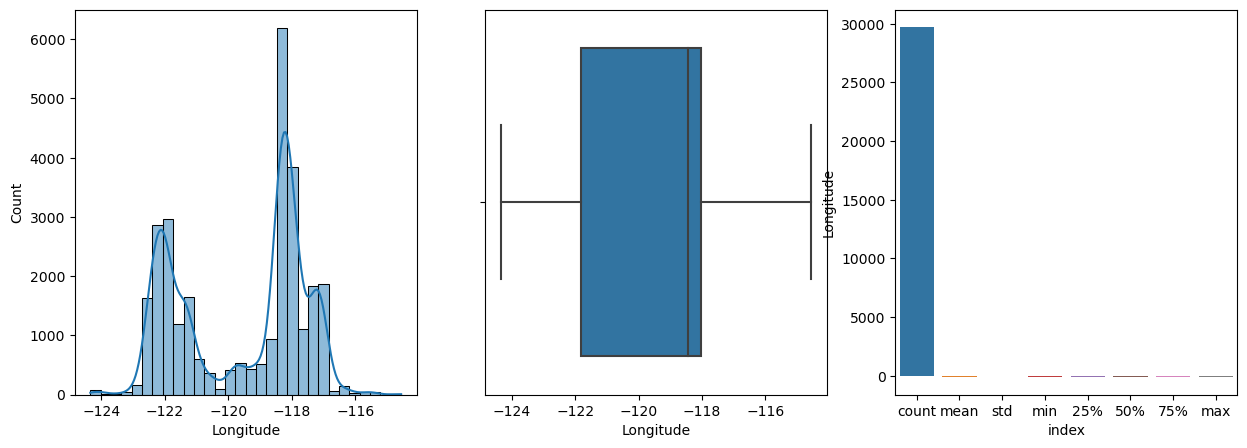

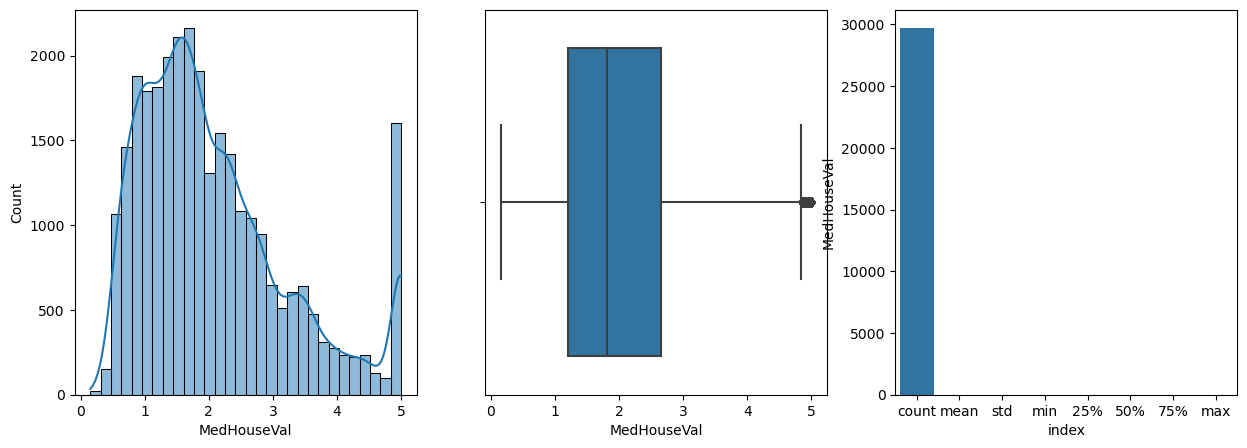

In [8]:
for col in data:
    fig, axs = plt.subplots(1,3,figsize=(15,5))
    sns.histplot(data=data, x=col, bins=30,kde=True, ax = axs[0])
    sns.boxplot(x=data[col], ax=axs[1])
    sns.barplot(data= data[col].describe().reset_index(), x='index', y=col, ax=axs[2])

In [9]:
data.drop('id',axis=1,inplace=True)

In [10]:
def find_boundry(df,variable):
    Q1 =df[variable].quantile(.25)
    Q3 =df[variable].quantile(.75)
    IQR = Q3 - Q1
    lower_boundry = Q1 - 1.5*IQR
    upper_boundry = Q3 + 1.5*IQR
    
    return lower_boundry ,upper_boundry
def treat_outliers(df,variable):
    lower_boundry ,upper_boundry = find_boundry(df,variable)
    df[variable] = np.where(df[variable] > upper_boundry, upper_boundry, df[variable])
    df[variable] = np.where(df[variable] < lower_boundry, lower_boundry, df[variable])
    return df.head()

In [11]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [12]:
treat_outliers(data,'MedInc')
treat_outliers(data,'AveRooms')
treat_outliers(data,'AveBedrms')
treat_outliers(data,'Population')
treat_outliers(data,'AveOccup')
treat_outliers(data,'MedHouseVal')

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  3.2375       5.0  6.028881   1.051118      3220.0  2.717201     38.10   
1  4.5500      18.0  6.091451   1.030581      1623.0  3.330014     34.37   
2  6.0743      16.0  6.394805   1.027350      1574.0  3.091451     34.11   
3  3.6875      15.0  5.164835   1.056911       616.0  2.737892     38.49   
4  6.1273      11.0  6.256544   1.029503      3220.0  2.383468     34.19   

   Longitude  MedHouseVal  
0    -122.14        1.924  
1    -118.52        1.991  
2    -117.80        2.610  
3    -122.59        1.917  
4    -118.64        2.915

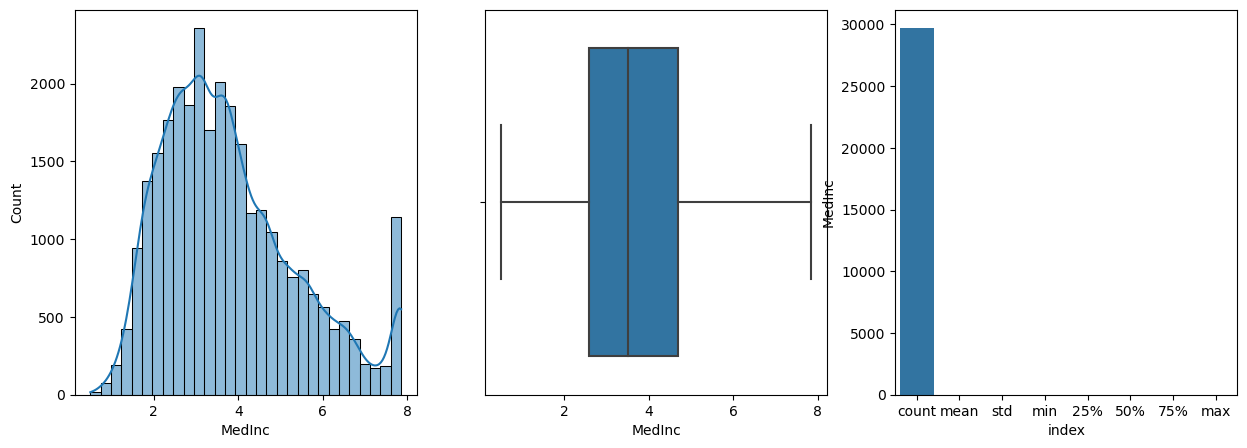

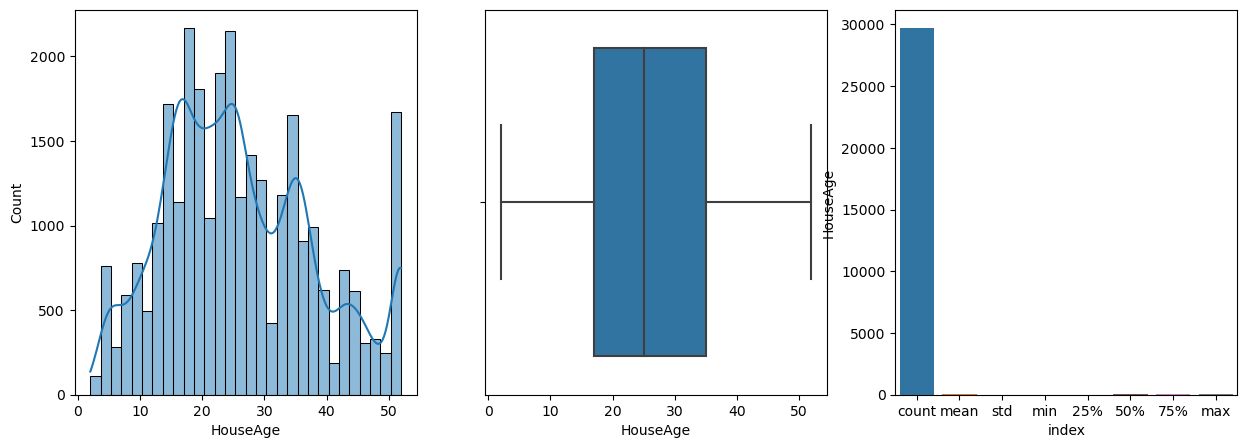

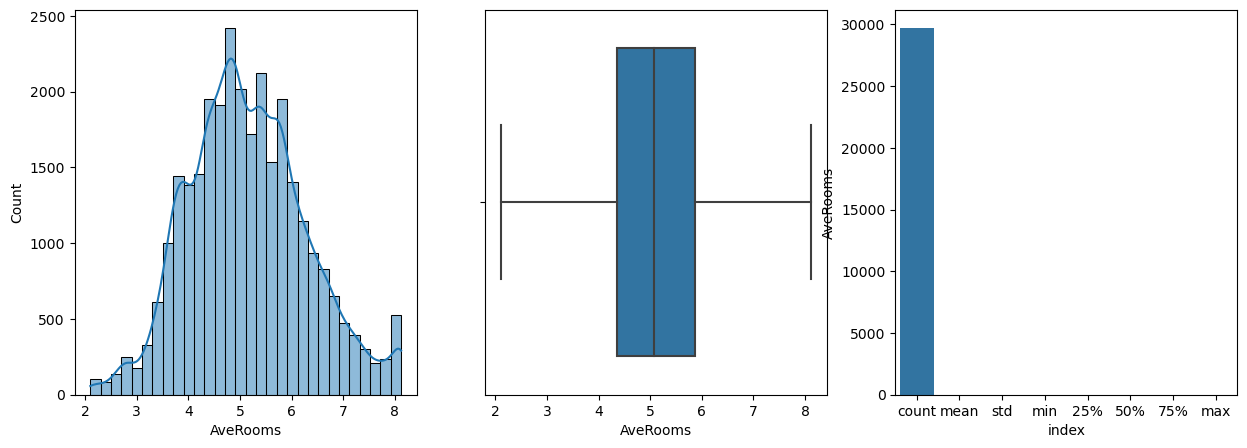

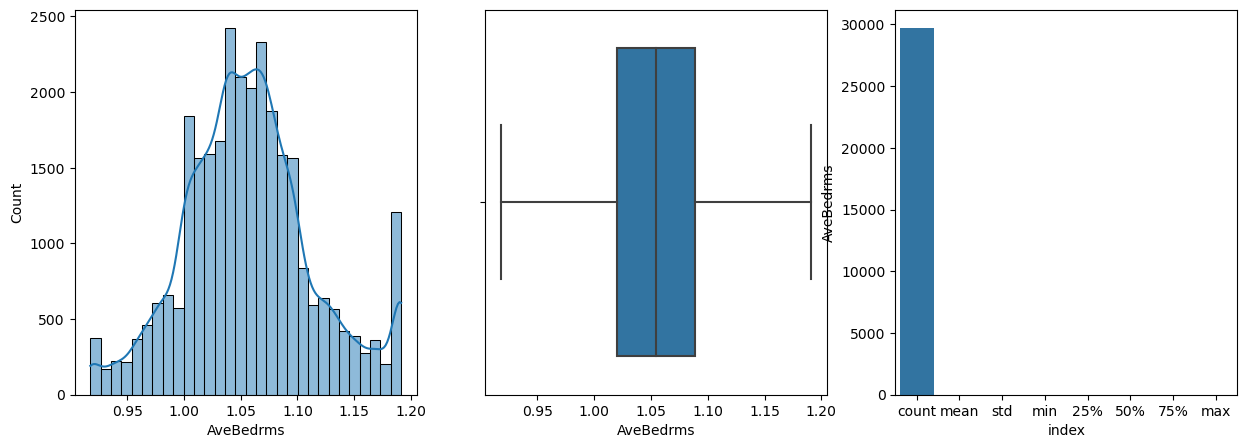

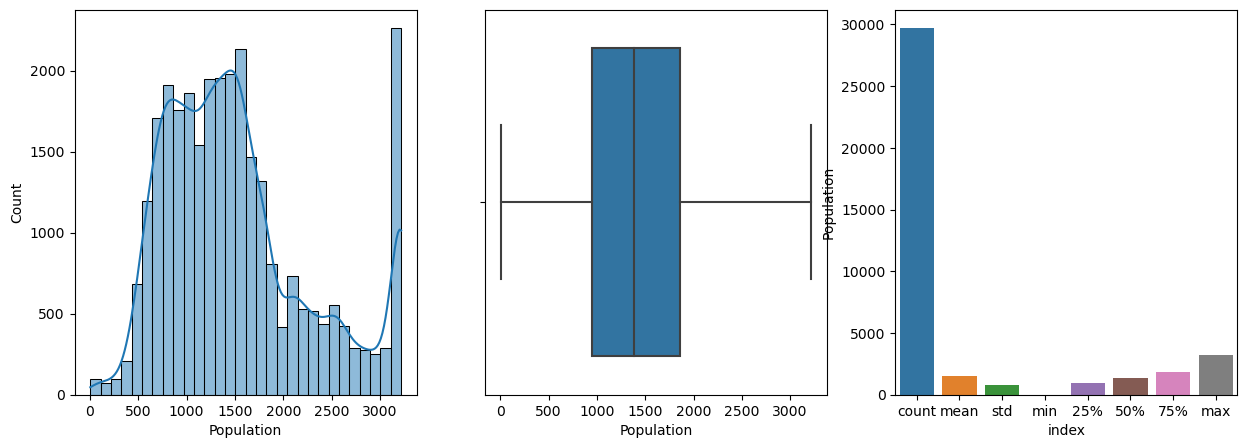

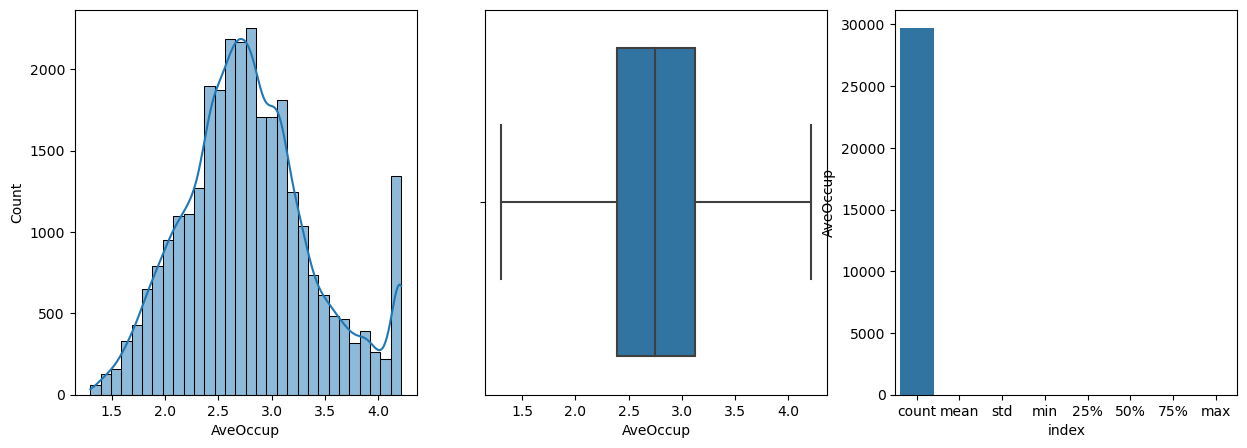

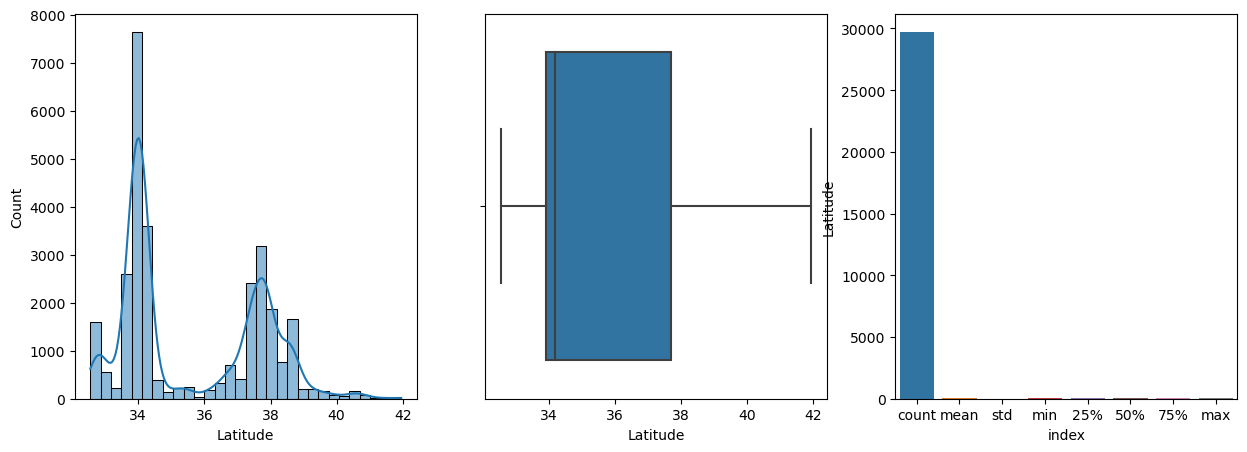

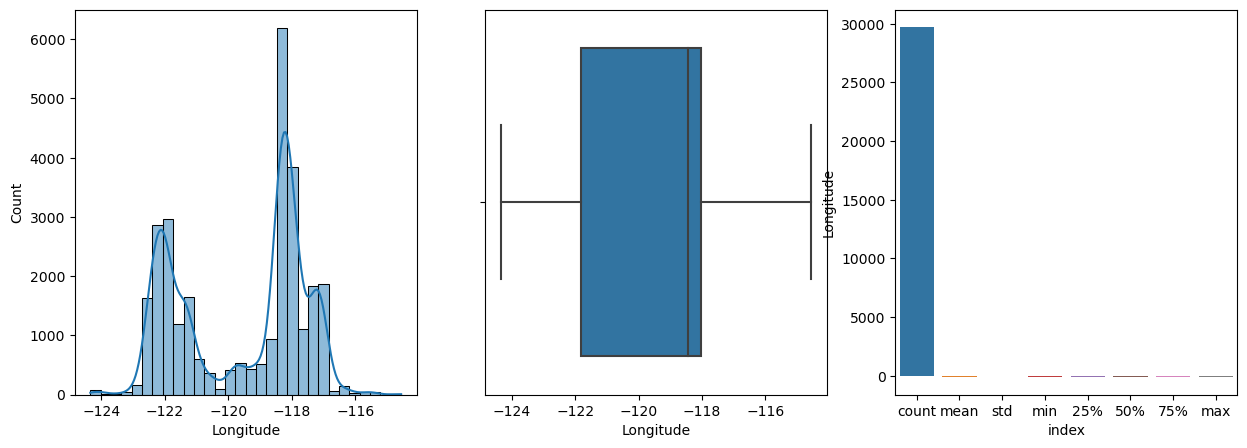

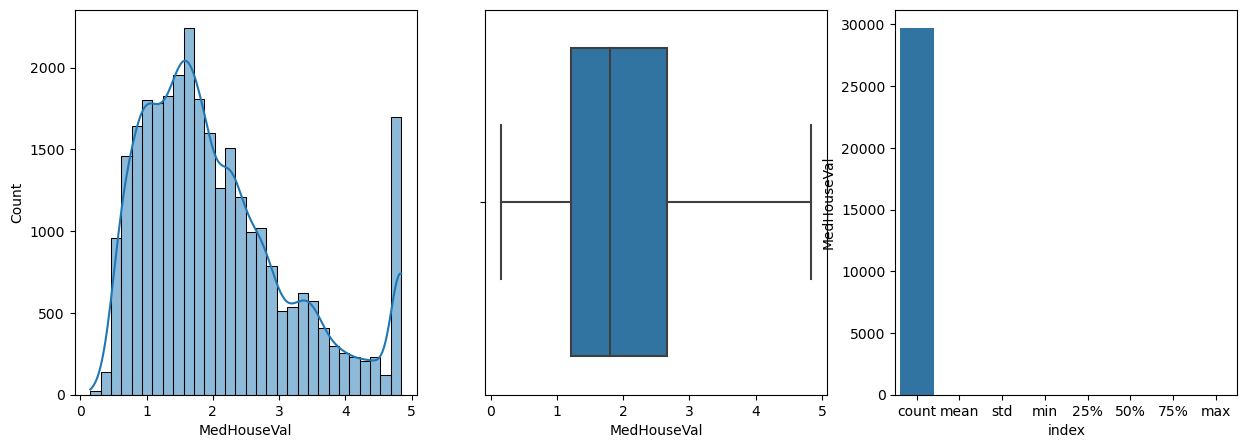

In [13]:
for col in data:
    fig, axs = plt.subplots(1,3,figsize=(15,5))
    sns.histplot(data=data, x=col, bins=30,kde=True, ax = axs[0])
    sns.boxplot(x=data[col], ax=axs[1])
    sns.barplot(data= data[col].describe().reset_index(), x='index', y=col, ax=axs[2])

<Figure size 2000x2000 with 0 Axes>

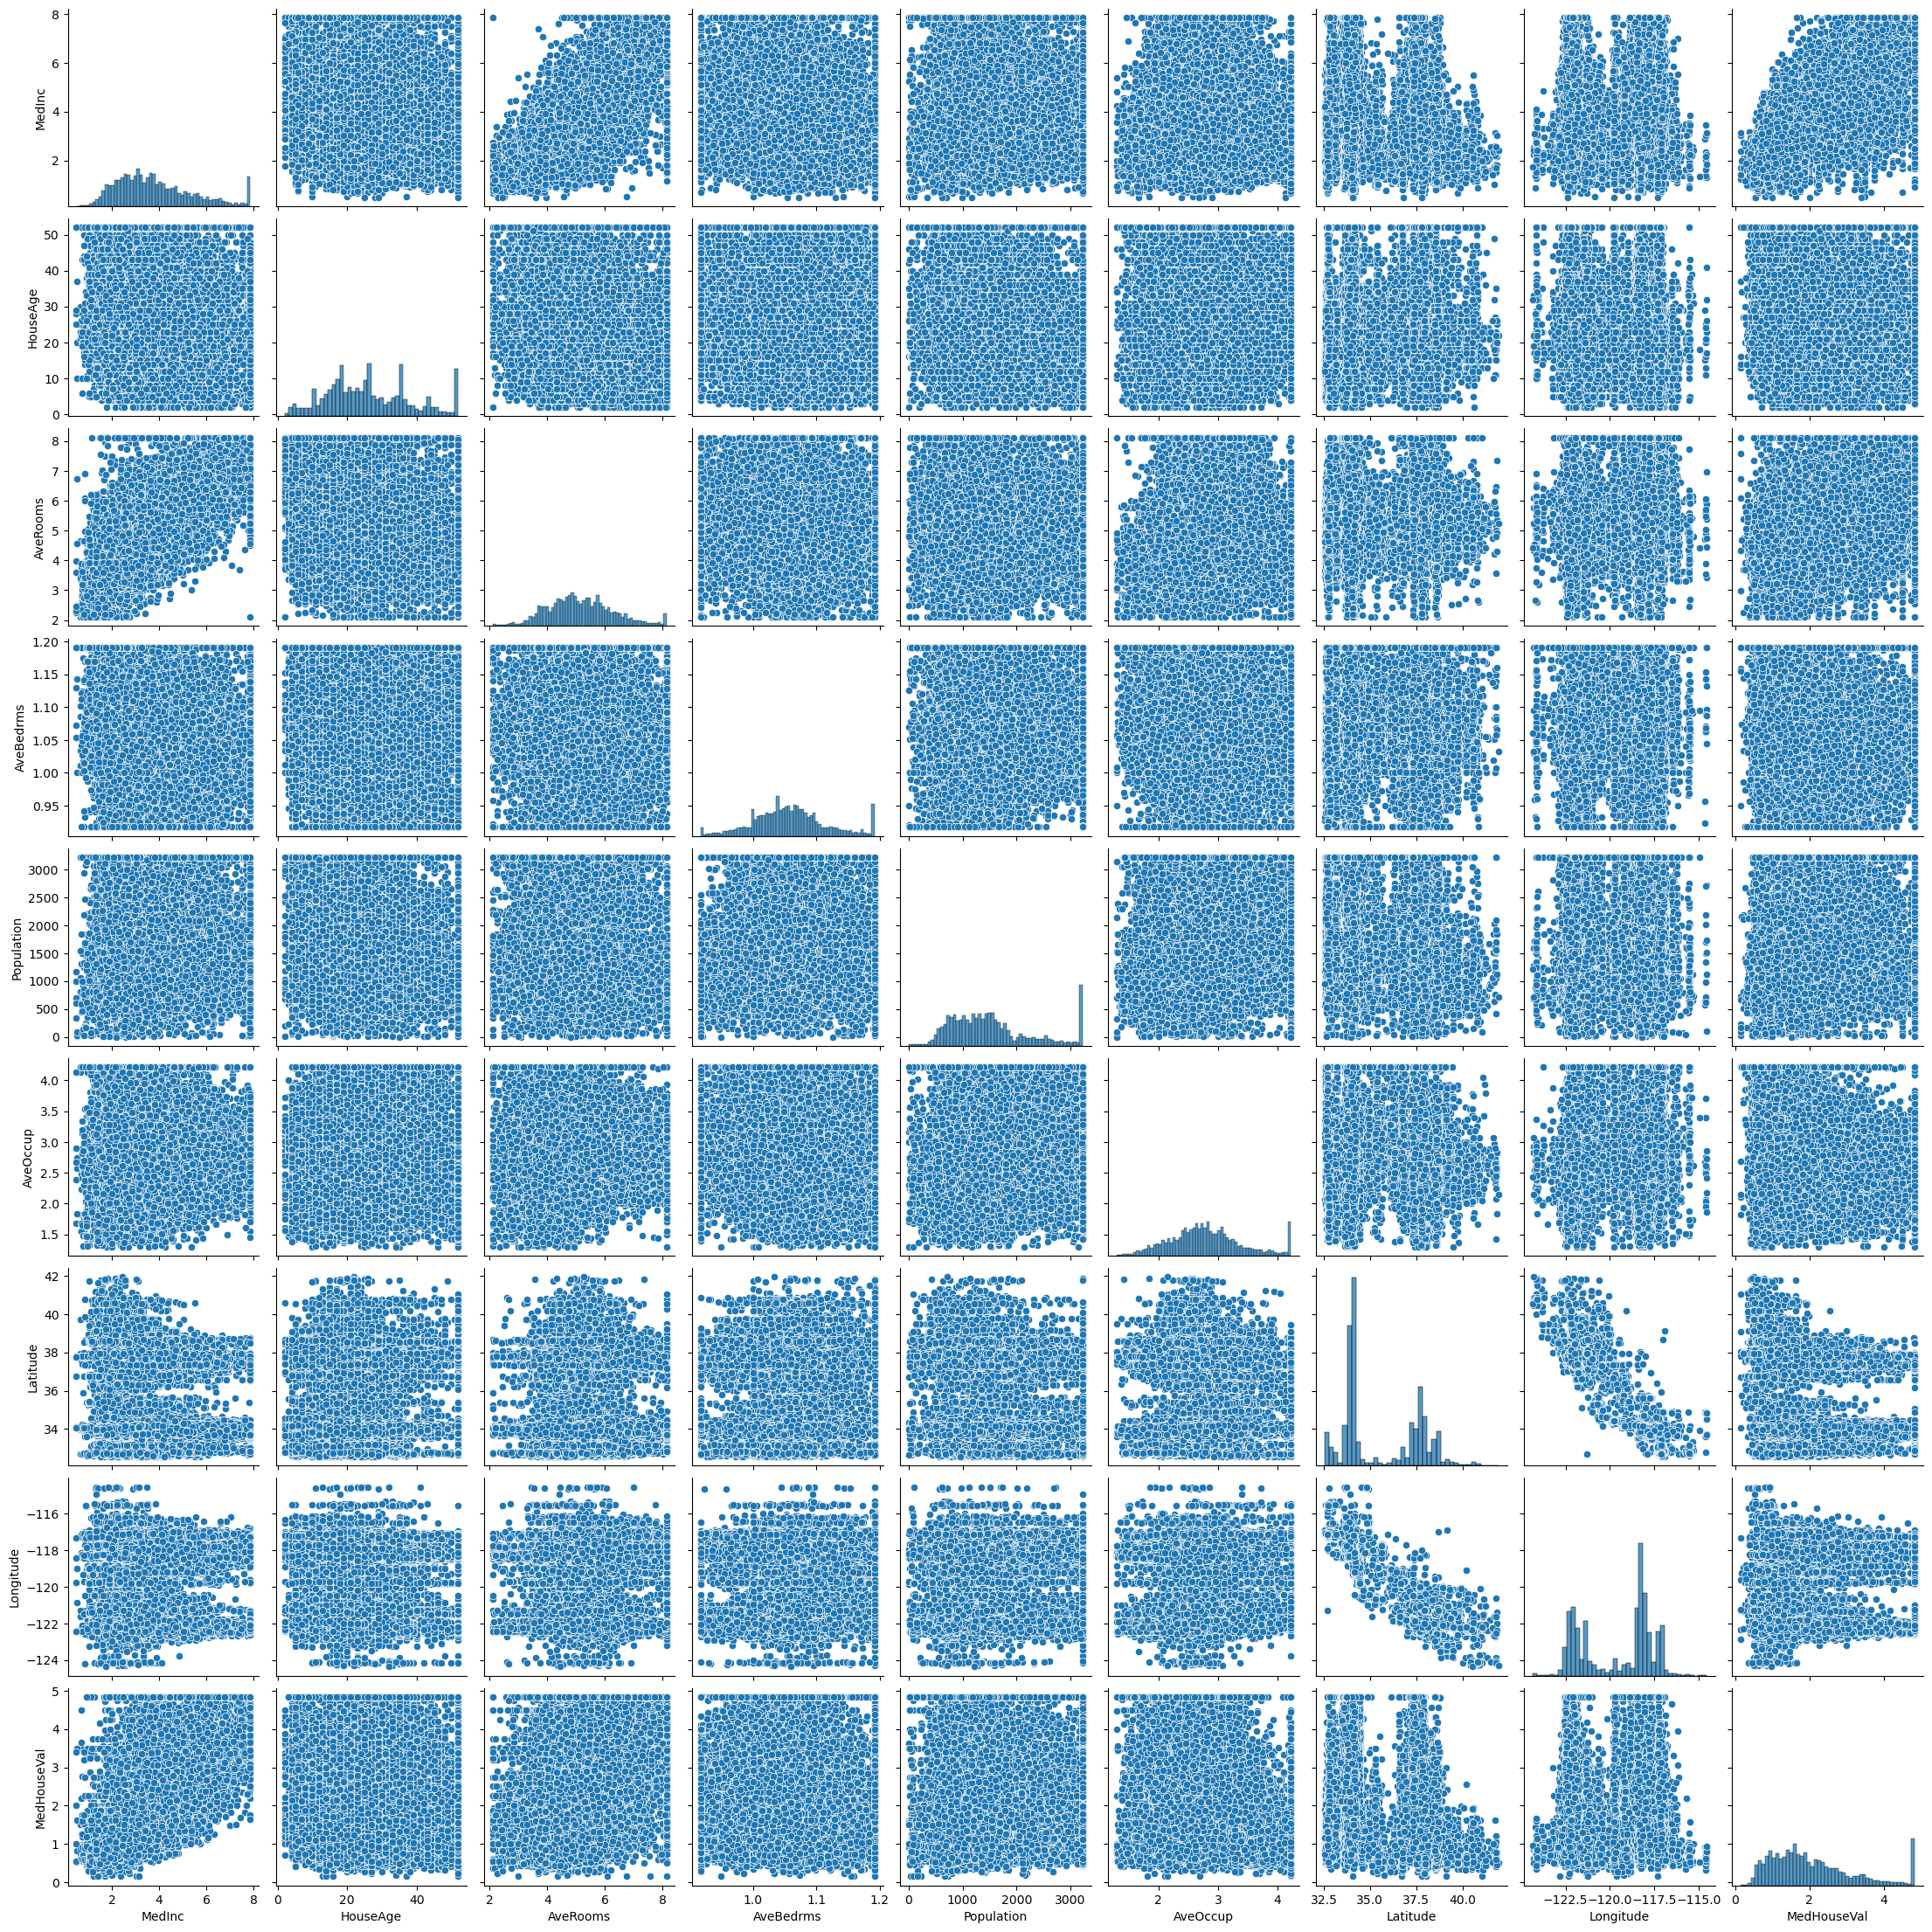

In [14]:
plt.figure(figsize=(20,20))
sns.pairplot(data)
plt.show()

<AxesSubplot:>

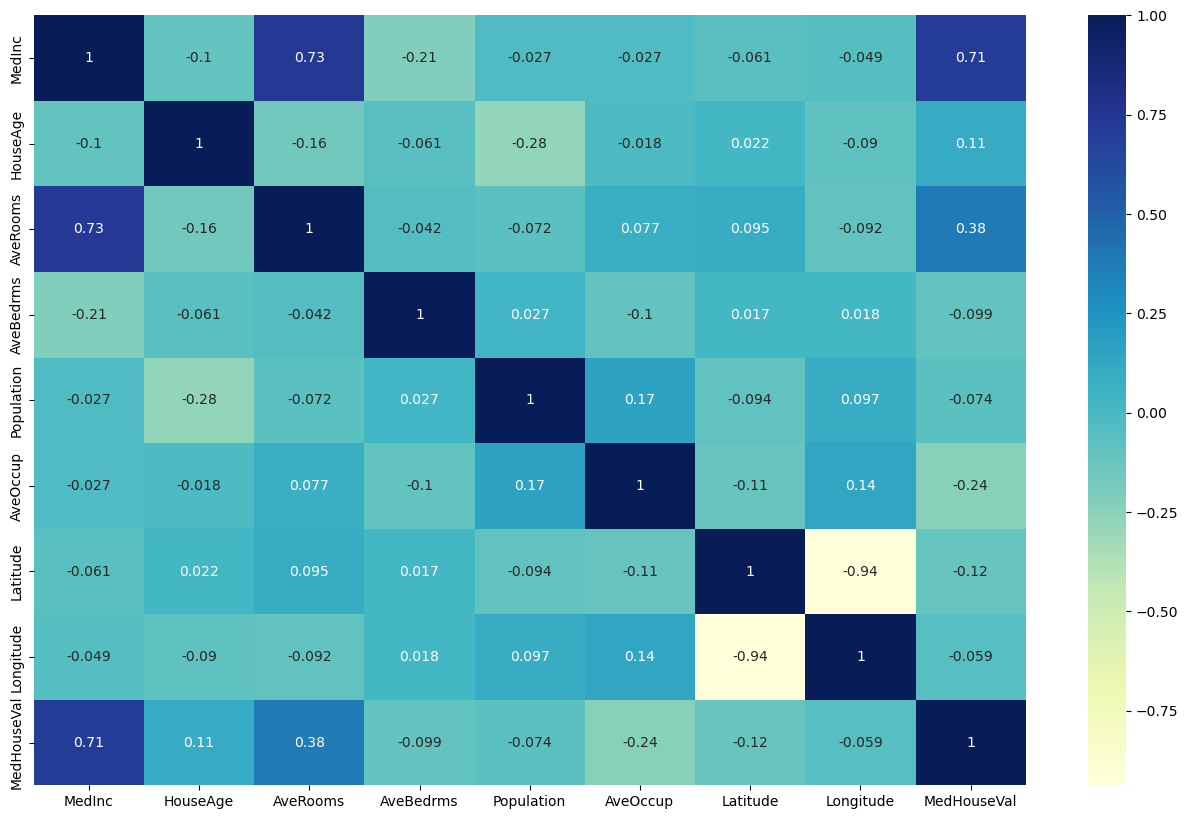

In [15]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

# Modeling

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
features = data.drop('MedHouseVal',axis=1)
target = data['MedHouseVal']

In [18]:
train_size = 0.7
test_size = 0.2
holdout_size = 0.1

In [19]:
X_temp , X_holdout, y_temp ,y_holdout = train_test_split(features,target,
                                                          test_size=holdout_size , random_state=10)

In [20]:
X_holdout.shape , y_holdout.shape , X_temp.shape , y_temp.shape

((2971, 8), (2971,), (26738, 8), (26738,))

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X_temp ,y_temp , test_size=test_size ,random_state=10)

In [22]:
X_train.shape ,X_test.shape ,y_train.shape , y_test.shape

((21390, 8), (5348, 8), (21390,), (5348,))

In [23]:
data.shape

(29709, 9)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error
from lightgbm import LGBMRegressor
from xgboost import XGBRFRegressor

In [25]:
def regressor_rmse(X_train, y_train, X_holdout, y_holdout, X_test, y_test):
    for model in [LinearRegression, SVR, Lasso, Ridge, KNeighborsRegressor]:
        regressor = model()
        regressor.fit(X_train, y_train)
        holdout_predictions = regressor.predict(X_holdout)
        holdout_rmse = np.sqrt(mean_squared_error(y_holdout, holdout_predictions))
        test_predictions = regressor.predict(X_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
        print('RMSE for {} on test set is {}'.format(model.__name__, test_rmse))
        print('RMSE for {} on holdout set is {}'.format(model.__name__, holdout_rmse))

In [63]:
regressor_rmse(X_train, y_train, X_holdout, y_holdout, X_test, y_test)

RMSE for LinearRegression on test set is 0.6756341083536559
RMSE for LinearRegression on holdout set is 0.6716207588699658
RMSE for SVR on test set is 1.1423347252632448
RMSE for SVR on holdout set is 1.1296028210490658
RMSE for Lasso on test set is 1.010142964477465
RMSE for Lasso on holdout set is 1.0041834078317042
RMSE for Ridge on test set is 0.6756638268795868
RMSE for Ridge on holdout set is 0.6716716501062141
RMSE for KNeighborsRegressor on test set is 1.0028178299838104
RMSE for KNeighborsRegressor on holdout set is 0.9990451784263458


In [27]:
from sklearn.model_selection import GridSearchCV
def hyperparameter_tuning(model, train_data, target_data, param_grid):
    # Create the GridSearchCV object
    grid_search = GridSearchCV(model, param_grid, cv=5, return_train_score=True)

    # Fit the model using the training data and target values
    grid_search.fit(train_data, target_data)

    # Get the best estimator from the search
    best_model = grid_search.best_estimator_

    # Return the best hyperparameters from the search and the best model
    return {'best_params': grid_search.best_params_, 'best_model': best_model}

# DecisionTreeRegressor

In [28]:
#dt_model = DecisionTreeRegressor()

In [29]:
#param_grid = {
#            "max_depth": [5, 15,25 ],
#           "min_samples_leaf": [2, 25,50],
#           "max_features": [0.1, 0.9]
#   }

In [30]:
#hyperparameter_tuning(dt_model,features,target,param_grid)

In [31]:
#model = DecisionTreeRegressor(max_depth=25, max_features=0.9, min_samples_leaf=50,random_state=0)

In [32]:
#model.fit(X_train,y_train)

In [33]:
#test_pred = model.predict(X_test)

In [34]:
#np.sqrt(mean_squared_error(y_test, test_pred))

In [35]:
#holdout_pred= model.predict(X_holdout)

In [36]:
#np.sqrt(mean_squared_error(y_holdout, holdout_pred))

In [37]:
!pip install bayesian-optimization

# bayesian-optimization for RandomForestRegressor

In [38]:
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization

def rfc_cv(n_estimators, max_depth, min_samples_leaf, max_features, data, targets):
    estimator = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=121
    )
    cval = cross_val_score(estimator, data, targets,
                           scoring="neg_root_mean_squared_error", cv=3) 
    return cval.mean()

def rfc_crossval(n_estimators, max_depth, min_samples_leaf, max_features):
        return rfc_cv(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            min_samples_leaf=int(min_samples_leaf),
            max_features=max(min(max_features, 0.999), 1e-3),
            data=X_train,
            targets=y_train,
        )
        
optimizer = BayesianOptimization(
        f=rfc_crossval,
        pbounds={
            "n_estimators": (10, 250),
            "max_depth": (5,15),
            "min_samples_leaf": (2, 25),
            "max_features": (0.1, 0.999),
        },
        random_state=111,
        verbose=2
    )
optimizer.maximize(n_iter=25)

best_params = optimizer.max['params']
best_params['max_depth'] = int(best_params['max_depth'])
best_params['max_features'] = best_params['max_features']
best_params['min_samples_leaf'] = int(best_params['min_samples_leaf'])
best_params['n_estimators'] = int(best_params['n_estimators'])

best_model = RandomForestRegressor(random_state=121)
best_model.set_params(**best_params)
best_model.fit(X_train, y_train)

|   iter    |  target   | max_depth | max_fe... | min_sa... | n_esti... |
-------------------------------------------------------------------------
| 1         | -0.6034   | 11.12     | 0.252     | 12.03     | 194.6     |
| 2         | -0.7366   | 7.953     | 0.2341    | 2.517     | 110.9     |
| 3         | -0.6323   | 7.387     | 0.4036    | 24.79     | 67.05     |
| 4         | -0.6696   | 5.812     | 0.702     | 16.29     | 75.82     |
| 5         | -0.6843   | 9.662     | 0.2064    | 3.701     | 226.2     |
| 6         | -0.6757   | 5.47      | 0.8845    | 17.66     | 248.7     |
| 7         | -0.5946   | 11.49     | 0.854     | 10.88     | 242.1     |
| 8         | -0.6713   | 12.17     | 0.1192    | 23.77     | 62.58     |
| 9         | -0.5922   | 13.6      | 0.3699    | 5.731     | 160.0     |
| 10        | -0.5932   | 12.36     | 0.961     | 10.99     | 245.3     |
| 11        | -0.5905   | 15.0      | 0.999     | 3.893     | 244.2     |
| 12        | -0.5964   | 12.75     | 

RandomForestRegressor(max_depth=14, max_features=0.38071635623237365,
                      min_samples_leaf=7, n_estimators=154, random_state=121)

In [39]:
model =RandomForestRegressor(max_depth=14, max_features=0.38071635623237365,
                      min_samples_leaf=7, n_estimators=154, random_state=121)

In [40]:
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=14, max_features=0.38071635623237365,
                      min_samples_leaf=7, n_estimators=154, random_state=121)

In [41]:
test_pred = model.predict(X_test)

In [42]:
np.sqrt(mean_squared_error(y_test, test_pred))

0.5848422372411902

In [43]:
holdout_pred= model.predict(X_holdout)

In [44]:
np.sqrt(mean_squared_error(y_holdout, holdout_pred))

0.5774045567096556

# bayesian-optimization for LGBMRegressor

In [45]:
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
import lightgbm as lgb
from lightgbm import LGBMRegressor
def lgb_cv(n_estimators, max_depth, num_leaves, subsample,colsample_bytree, data, targets):
    estimator = LGBMRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        num_leaves=num_leaves,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=121,
        class_weight='balanced'
    )
    cval = cross_val_score(estimator, data, targets,
                           scoring='neg_root_mean_squared_error', cv=3)
    return cval.mean()

def lgb_crossval(n_estimators, max_depth, num_leaves, subsample,colsample_bytree):
        return lgb_cv(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            num_leaves=int(num_leaves),
            subsample=max(min(subsample, 0.999), 1e-3),
            colsample_bytree=max(min(colsample_bytree, 0.999), 1e-3),
            data=X_train,
            targets=y_train,
        )
        
optimizer = BayesianOptimization(
        f=lgb_crossval,
        pbounds={
            "n_estimators": (10, 250),
            "max_depth": (3,15),
            "num_leaves": (10, 30),
            "subsample": (0.1, 0.999),
            "colsample_bytree":(0.1, 0.999)
        },
        random_state=121,
        verbose=2
    )
optimizer.maximize(n_iter=10)

best_params = optimizer.max['params']
best_params['max_depth'] = int(best_params['max_depth'])
best_params['num_leaves'] = int(best_params['num_leaves'])
best_params['subsample'] = (best_params['subsample'])
best_params['colsample_bytree'] = (best_params['colsample_bytree'])
best_params['n_estimators'] = int(best_params['n_estimators'])

best_model = LGBMRegressor(random_state=121)
best_model.set_params(**best_params)
best_model.fit(X_train, y_train)

|   iter    |  target   | colsam... | max_depth | n_esti... | num_le... | subsample |
-------------------------------------------------------------------------------------
| 1         | -0.6786   | 0.2001    | 5.529     | 65.91     | 13.04     | 0.8463    |
| 2         | -0.592    | 0.4667    | 9.669     | 188.9     | 14.97     | 0.9708    |
| 3         | -0.694    | 0.9565    | 8.878     | 14.39     | 27.15     | 0.464     |
| 4         | -0.5919   | 0.6596    | 6.544     | 233.1     | 18.11     | 0.61      |
| 5         | -0.7203   | 0.3209    | 5.709     | 19.19     | 21.62     | 0.8455    |
| 6         | -0.591    | 0.636     | 6.031     | 233.1     | 19.18     | 0.4984    |
| 7         | -0.7053   | 0.1       | 3.0       | 146.6     | 30.0      | 0.1       |
| 8         | -0.5955   | 0.999     | 15.0      | 210.0     | 30.0      | 0.1       |
| 9         | -0.7116   | 0.1       | 15.0      | 250.0     | 30.0      | 0.999     |
| 10        | -0.5975   | 0.8533    | 3.0       | 211.

LGBMRegressor(colsample_bytree=0.6359954152286923, max_depth=6,
              n_estimators=233, num_leaves=19, random_state=121,
              subsample=0.49838803017530053)

In [46]:
model =LGBMRegressor(colsample_bytree=0.6359954152286923, max_depth=6,
              n_estimators=233, num_leaves=19, random_state=121,
              subsample=0.49838803017530053)

In [47]:
model.fit(X_train,y_train)

LGBMRegressor(colsample_bytree=0.6359954152286923, max_depth=6,
              n_estimators=233, num_leaves=19, random_state=121,
              subsample=0.49838803017530053)

In [48]:
test_pred = model.predict(X_test)

In [49]:
np.sqrt(mean_squared_error(y_test, test_pred))

0.555503597951717

In [50]:
holdout_pred= model.predict(X_holdout)

In [51]:
np.sqrt(mean_squared_error(y_holdout, holdout_pred))

0.5496075580061813

In [52]:
print('.....................................................................................................................')

.....................................................................................................................


In [53]:
df = pd.read_csv('testing_data.csv')

In [54]:
df.head()

id  MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0  16148  2.2235      12.0  3.967700   1.177003      1457.0  3.633075   
1   7213  4.0484      26.0  6.776596   1.038298      1816.0  3.836257   
2  23067  2.3571      20.0  3.621701   1.074380      2919.0  1.554825   
3  28335  1.7552      30.0  2.342071   1.093834      1327.0  3.065442   
4  33439  2.5754      52.0  3.136150   1.166667       870.0  1.890476   

   Latitude  Longitude  
0     34.09    -117.30  
1     34.28    -118.74  
2     37.36    -121.89  
3     34.05    -118.29  
4     37.78    -122.42

In [55]:
id_ = df.id

In [56]:
df.shape

(7428, 9)

In [57]:
df.drop('id',axis=1,inplace=True)

In [58]:
treat_outliers(df,'MedInc')
treat_outliers(df,'AveRooms')
treat_outliers(df,'AveBedrms')
treat_outliers(df,'Population')
treat_outliers(df,'AveOccup')

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.2235      12.0  3.967700   1.177003      1457.0  3.633075     34.09   
1  4.0484      26.0  6.776596   1.038298      1816.0  3.836257     34.28   
2  2.3571      20.0  3.621701   1.074380      2919.0  1.554825     37.36   
3  1.7552      30.0  2.342071   1.093834      1327.0  3.065442     34.05   
4  2.5754      52.0  3.136150   1.166667       870.0  1.890476     37.78   

   Longitude  
0    -117.30  
1    -118.74  
2    -121.89  
3    -118.29  
4    -122.42

In [59]:
df_pred= model.predict(df)

In [60]:
df_pred

array([0.96402153, 2.01679389, 2.02915749, ..., 3.5236115 , 4.7748659 ,
       1.76569027])

In [61]:
dataframe = pd.DataFrame({'id_':id_ , 'MedHouseVal_pred':df_pred})

In [62]:
dataframe.to_csv('dataframe.csv',index=False)